In [53]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
df = pd.read_csv(Path("car_price_prediction.csv"))
df

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,45798355,8467,-,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.0 Turbo,300000 km,4.0,Manual,Rear,02-Mar,Left wheel,Silver,5
19233,45778856,15681,831,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600 km,4.0,Tiptronic,Front,04-May,Left wheel,Red,8
19234,45804997,26108,836,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2,116365 km,4.0,Automatic,Front,04-May,Left wheel,Grey,4
19235,45793526,5331,1288,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,2,51258 km,4.0,Automatic,Front,04-May,Left wheel,Black,4


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

In [55]:
df.describe()

,ID,Price,Prod. year,Cylinders,Airbags
count,1.923700e+04,1.923700e+04,19237.000000,19237.000000,19237.000000
mean,4.557654e+07,1.855593e+04,2010.912824,4.582991,6.582627
std,9.365914e+05,1.905813e+05,5.668673,1.199933,4.320168
min,2.074688e+07,1.000000e+00,1939.000000,1.000000,0.000000
25%,4.569837e+07,5.331000e+03,2009.000000,4.000000,4.000000
50%,4.577231e+07,1.317200e+04,2012.000000,4.000000,6.000000
75%,4.580204e+07,2.207500e+04,2015.000000,4.000000,12.000000
max,4.581665e+07,2.630750e+07,2020.000000,16.000000,16.000000


In [56]:
null_counts = df.isnull().sum()
print(null_counts)

ID                  0
Price               0
Levy                0
Manufacturer        0
Model               0
Prod. year          0
Category            0
Leather interior    0
Fuel type           0
Engine volume       0
Mileage             0
Cylinders           0
Gear box type       0
Drive wheels        0
Doors               0
Wheel               0
Color               0
Airbags             0
dtype: int64


In [57]:
duplicate_rows = df[df.duplicated()]
print("Duplicate Rows:")
print(duplicate_rows)

Duplicate Rows:
             ID  Price  Levy   Manufacturer        Model  Prod. year  \
425    45815372   7840     -  MERCEDES-BENZ        E 200        1998   
1581   45815363   8781     -         TOYOTA          Ist        2002   
1697   45732125  18503     -         TOYOTA        Prius        2010   
1972   45507765  20385     -  MERCEDES-BENZ      CLS 500        2005   
2131   45815363   8781     -         TOYOTA          Ist        2002   
...         ...    ...   ...            ...          ...         ...   
18974  45815465   2352  1273          LEXUS       IS 350        2015   
19137  45810466  15125   642      CHEVROLET      Orlando        2012   
19200  45725908  36065   640  MERCEDES-BENZ  CLA 250 AMG        2013   
19203  45761487  13485   645         TOYOTA        Prius        2011   
19210  45732939   8311   642        HYUNDAI       Sonata        2012   

        Category Leather interior Fuel type Engine volume    Mileage  \
425        Sedan               No       CNG    

In [58]:
df_no_duplicates = df.drop_duplicates()
df=df_no_duplicates
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18924 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                18924 non-null  int64  
 1   Price             18924 non-null  int64  
 2   Levy              18924 non-null  object 
 3   Manufacturer      18924 non-null  object 
 4   Model             18924 non-null  object 
 5   Prod. year        18924 non-null  int64  
 6   Category          18924 non-null  object 
 7   Leather interior  18924 non-null  object 
 8   Fuel type         18924 non-null  object 
 9   Engine volume     18924 non-null  object 
 10  Mileage           18924 non-null  object 
 11  Cylinders         18924 non-null  float64
 12  Gear box type     18924 non-null  object 
 13  Drive wheels      18924 non-null  object 
 14  Doors             18924 non-null  object 
 15  Wheel             18924 non-null  object 
 16  Color             18924 non-null  object 
 17

In [59]:
df = df.drop(columns=['ID'])

In [60]:
df['Levy'].value_counts()

Levy
-       5709
765      482
891      453
639      403
640      398
        ... 
3156       1
2908       1
1279       1
1719       1
1901       1
Name: count, Length: 559, dtype: int64

In [61]:
df['Levy'] = df['Levy'].replace('-', np.nan)
df['Levy'] = df['Levy'].astype(float)

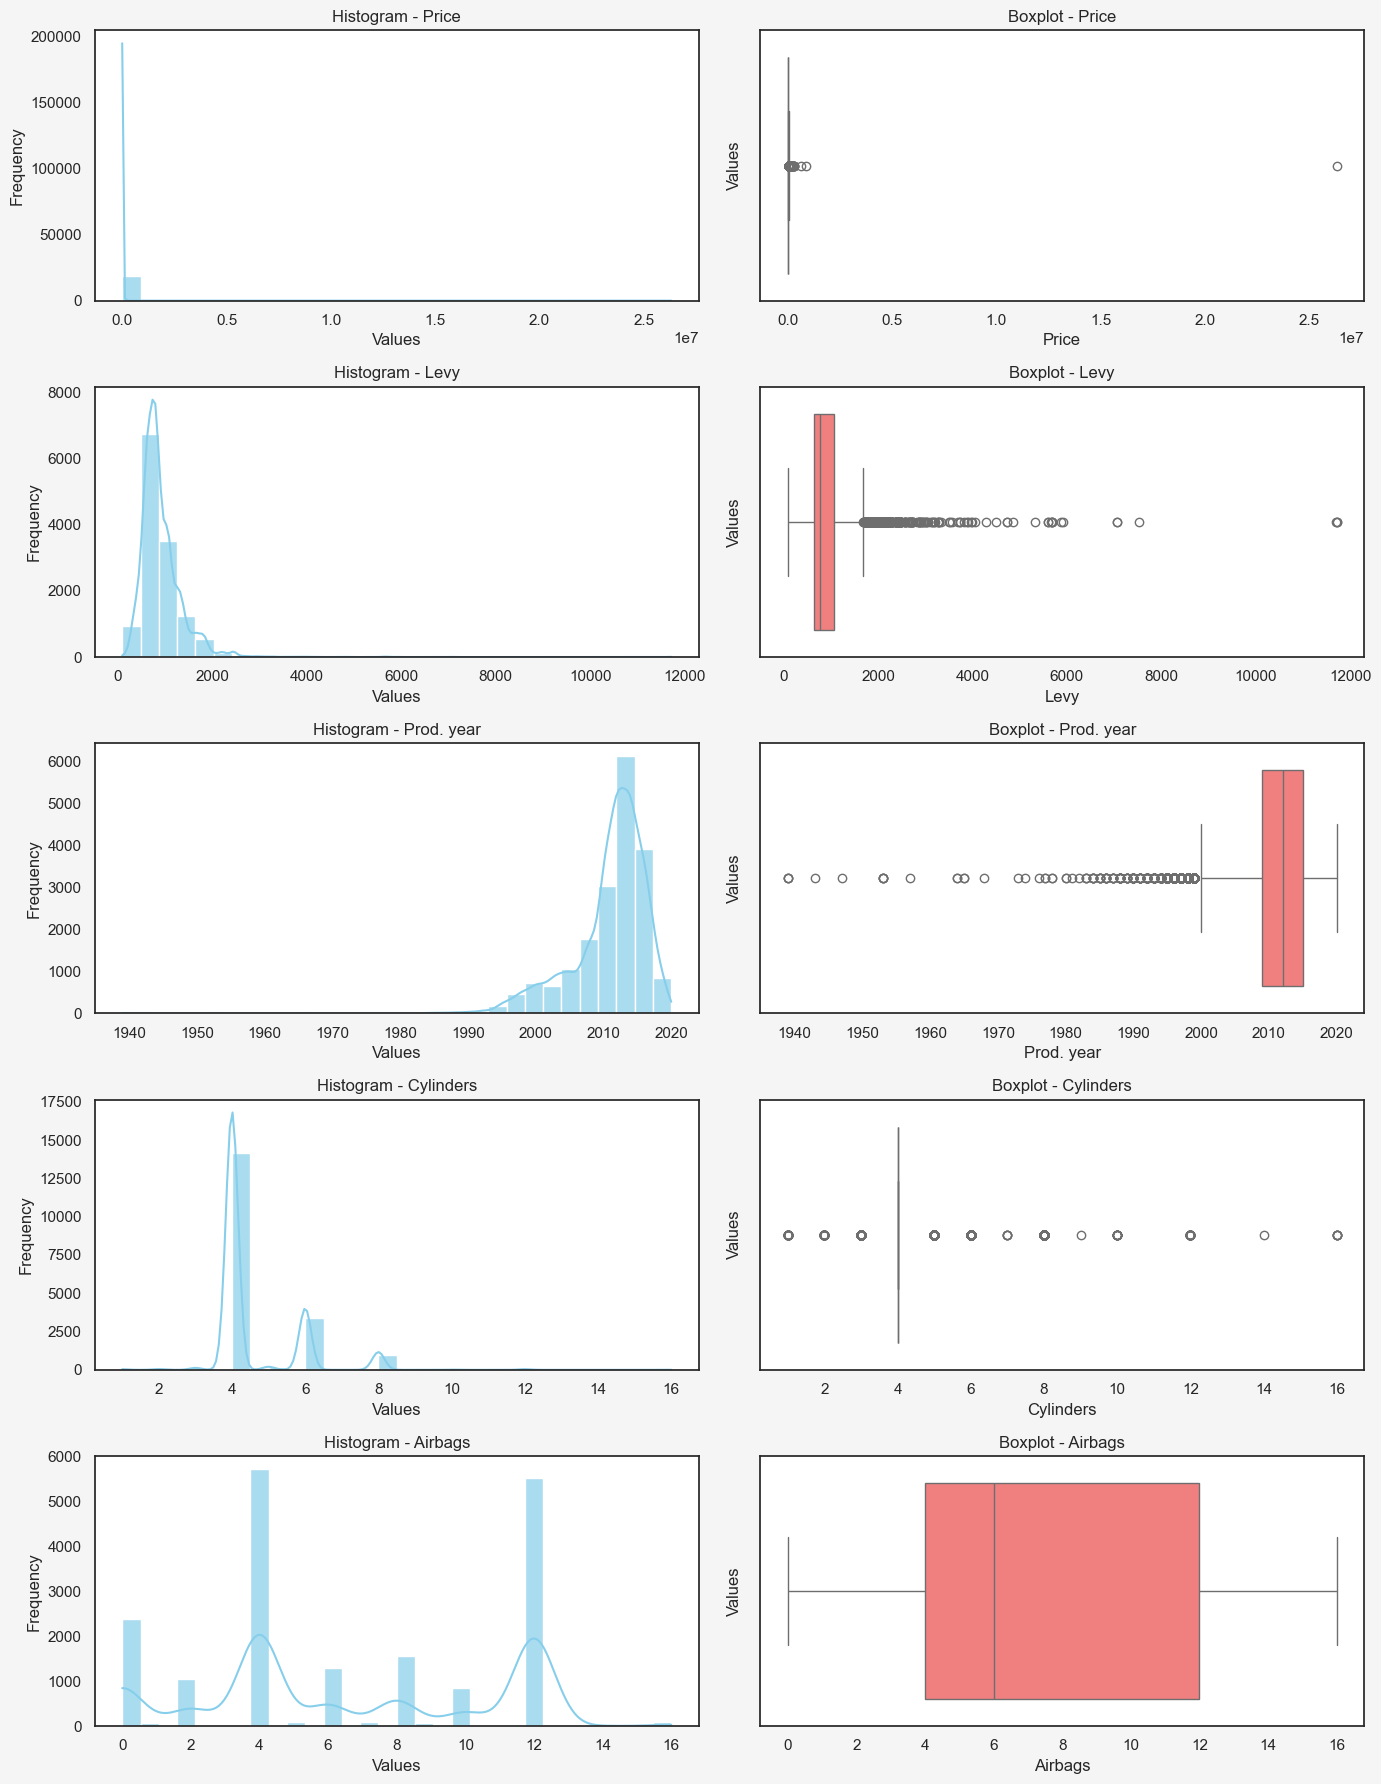

In [62]:
df['Levy'] = df['Levy'].astype(float)
numerical_columns = df.select_dtypes(include=['int64', 'float64'])
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(14, 18), facecolor='whitesmoke')
for i, column in enumerate(numerical_columns.columns):
    sns.histplot(df[column], bins=30, color='skyblue', alpha=0.7, kde=True, ax=axes[i, 0])
    axes[i, 0].set_title(f'Histogram - {column}')
    axes[i, 0].set_xlabel('Values')
    axes[i, 0].set_ylabel('Frequency')
    sns.boxplot(x=df[column], ax=axes[i, 1], color='lightcoral', boxprops=dict(facecolor='lightcoral'))
    axes[i, 1].set_title(f'Boxplot - {column}')
    axes[i, 1].set_ylabel('Values')
plt.tight_layout()
plt.show()

In [63]:
price_column = df['Price']
Q1 = price_column.quantile(0.25)
Q3 = price_column.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = (price_column < lower_bound) | (price_column > upper_bound)
num_outliers = np.sum(outliers)
print(f'Number of outliers: {num_outliers}')
df_no_outliers = df[~outliers]

Number of outliers: 1055


In [64]:
df=df_no_outliers
df

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,13328,1399.0,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,16621,1018.0,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,8467,NaN,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,3607,862.0,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,11726,446.0,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,8467,NaN,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.0 Turbo,300000 km,4.0,Manual,Rear,02-Mar,Left wheel,Silver,5
19233,15681,831.0,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600 km,4.0,Tiptronic,Front,04-May,Left wheel,Red,8
19234,26108,836.0,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2,116365 km,4.0,Automatic,Front,04-May,Left wheel,Grey,4
19235,5331,1288.0,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,2,51258 km,4.0,Automatic,Front,04-May,Left wheel,Black,4


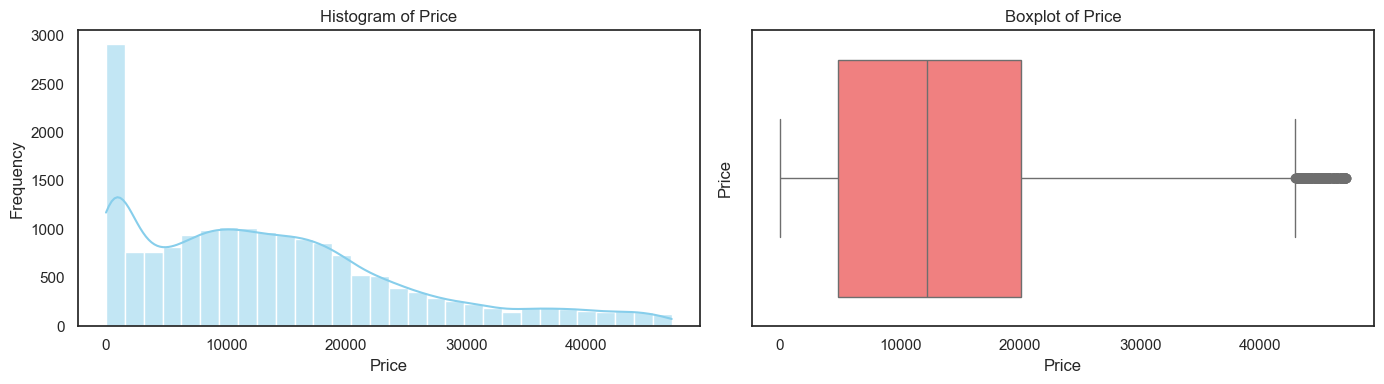

In [65]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 4))
sns.histplot(df['Price'], bins=30, kde=True, color='skyblue', ax=axes[0])
axes[0].set_title('Histogram of Price')
axes[0].set_xlabel('Price')
axes[0].set_ylabel('Frequency')
sns.boxplot(x=df['Price'], color='lightcoral', ax=axes[1], boxprops=dict(facecolor='lightcoral'))
axes[1].set_title('Boxplot of Price')
axes[1].set_ylabel('Price')
plt.tight_layout()
plt.show()

In [66]:
df['Manufacturer'].value_counts()

Manufacturer
TOYOTA           3502
HYUNDAI          3425
MERCEDES-BENZ    1874
FORD             1035
CHEVROLET        1021
                 ... 
PONTIAC             1
LANCIA              1
FERRARI             1
HAVAL               1
GREATWALL           1
Name: count, Length: 61, dtype: int64

C:\Users\Albaloo PC\AppData\Local\Temp\ipykernel_4248\1686533769.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Manufacturer', data=df, order=df['Manufacturer'].value_counts().index, palette=colors_count, ax=axes[1])
C:\Users\Albaloo PC\AppData\Local\Temp\ipykernel_4248\1686533769.py:10: UserWarning: 
The palette list has fewer values (10) than needed (61) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(x='Manufacturer', data=df, order=df['Manufacturer'].value_counts().index, palette=colors_count, ax=axes[1])
C:\Users\Albaloo PC\AppData\Local\Temp\ipykernel_4248\1686533769.py:15: UserWarning: Glyph 4321 (\N{GEORGIAN LETTER SAN}) missing from current font.
  plt.tight_layout()
C:\Users\Albaloo PC\AppData\Local\Temp\ipykernel_4248\1686533769.py:15: UserWarning: Glyph 4334 (\N{GEORGIAN LETTER XAN}) miss

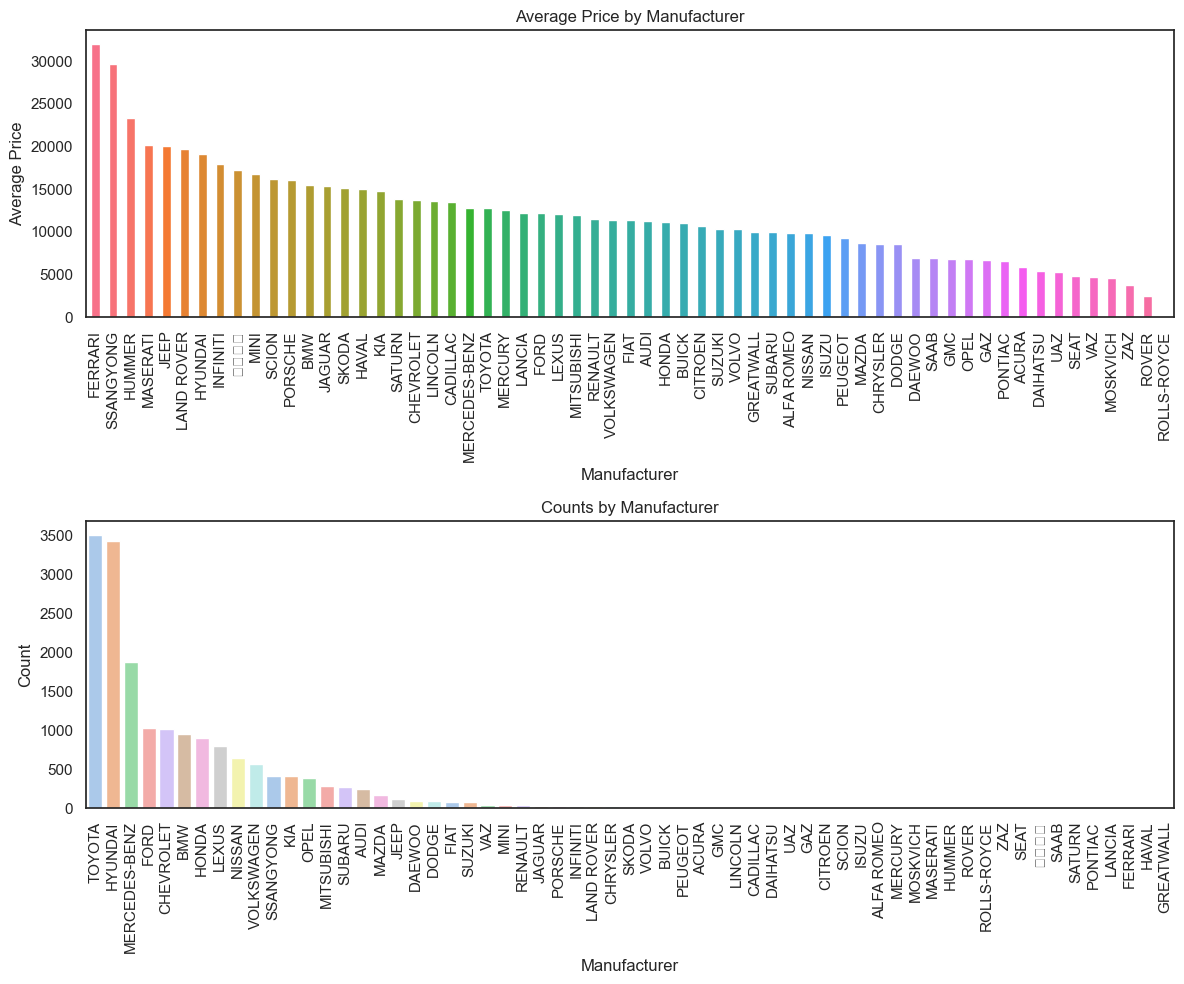

In [67]:
average_price_by_manufacturer = df.groupby('Manufacturer')['Price'].mean().sort_values(ascending=False)
manufacturer_counts = df['Manufacturer'].value_counts().loc[average_price_by_manufacturer.index]
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 10))
colors_bar = sns.color_palette('husl', len(average_price_by_manufacturer))
average_price_by_manufacturer.plot(kind='bar', color=colors_bar, ax=axes[0])
axes[0].set_title('Average Price by Manufacturer')
axes[0].set_xlabel('Manufacturer')
axes[0].set_ylabel('Average Price')
colors_count = sns.color_palette('pastel')
sns.countplot(x='Manufacturer', data=df, order=df['Manufacturer'].value_counts().index, palette=colors_count, ax=axes[1])
axes[1].set_title('Counts by Manufacturer')
axes[1].set_xlabel('Manufacturer')
axes[1].set_ylabel('Count')
axes[1].tick_params(axis='x', rotation=90)
plt.tight_layout()
plt.show()

In [68]:
df['Model'].value_counts()

Model
Prius                     1068
Sonata                    1007
Elantra                    907
Camry                      905
E 350                      526
                          ... 
Golf 2                       1
GLK 300                      1
Musa                         1
1500,1600 Schtufenheck       1
Prius C aqua                 1
Name: count, Length: 1498, dtype: int64

C:\Users\Albaloo PC\AppData\Local\Temp\ipykernel_4248\1034218380.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Price', data=df[df['Model'].isin(top_average_price_models)].sort_values('Price', ascending=False),
C:\Users\Albaloo PC\AppData\Local\Temp\ipykernel_4248\1034218380.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Model', data=df[df['Model'].isin(top_count_models)].sort_values('Model'), order=top_count_models,
C:\Users\Albaloo PC\AppData\Local\Temp\ipykernel_4248\1034218380.py:13: UserWarning: 
The palette list has fewer values (10) than needed (30) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(x='Model', data=df[df['Model']

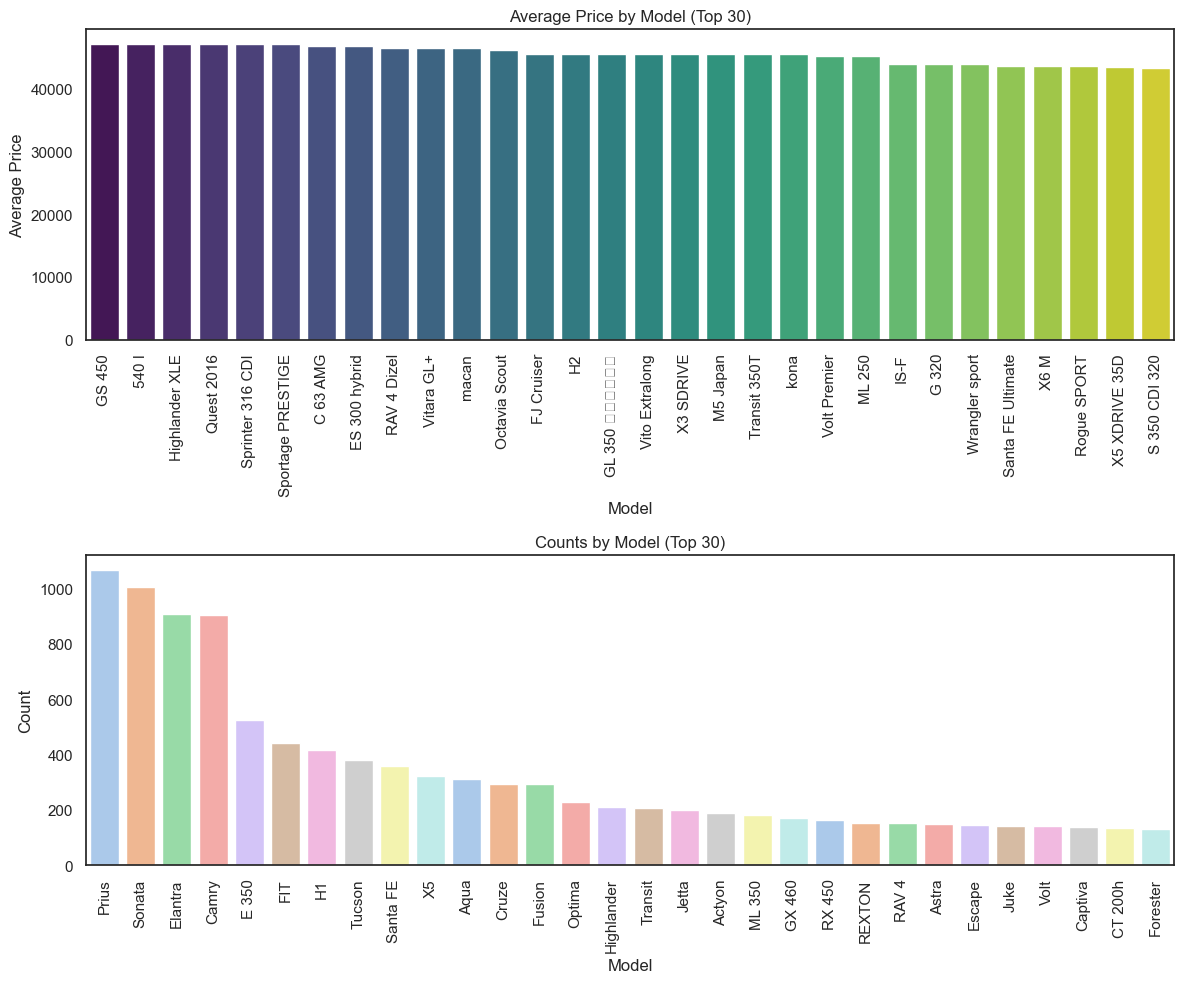

In [69]:
average_price_by_model = df.groupby('Model')['Price'].mean().sort_values(ascending=False)
top_average_price_models = average_price_by_model.head(30).index
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 10))
colors_price = sns.color_palette('viridis', len(top_average_price_models))
sns.barplot(x='Model', y='Price', data=df[df['Model'].isin(top_average_price_models)].sort_values('Price', ascending=False),
            palette=colors_price, ax=axes[0])
axes[0].set_title('Average Price by Model (Top 30)')
axes[0].set_xlabel('Model')
axes[0].set_ylabel('Average Price')
axes[0].tick_params(axis='x', rotation=90)
top_count_models = df['Model'].value_counts().head(30).index
colors_count = sns.color_palette('pastel')
sns.countplot(x='Model', data=df[df['Model'].isin(top_count_models)].sort_values('Model'), order=top_count_models,
              palette=colors_count, ax=axes[1])
axes[1].set_title('Counts by Model (Top 30)')
axes[1].set_xlabel('Model')
axes[1].set_ylabel('Count')
axes[1].tick_params(axis='x', rotation=90)
plt.tight_layout()
plt.show()

In [70]:
df['Category'].value_counts()

Category
Sedan          8318
Jeep           4736
Hatchback      2781
Minivan         620
Coupe           477
Universal       339
Microbus        290
Goods wagon     227
Pickup           41
Cabriolet        29
Limousine        11
Name: count, dtype: int64

In [71]:
df['Leather interior'].value_counts()

Leather interior
Yes    12737
No      5132
Name: count, dtype: int64

In [72]:
df['Fuel type'].value_counts()

Fuel type
Petrol            9309
Diesel            3634
Hybrid            3495
LPG                878
CNG                469
Plug-in Hybrid      83
Hydrogen             1
Name: count, dtype: int64

In [73]:
df['Engine volume'].value_counts()

Engine volume
2            3573
2.5          2167
1.8          1742
1.6          1428
1.5          1248
             ... 
4.2 Turbo       1
6.7             1
3.1             1
0.8 Turbo       1
1.1 Turbo       1
Name: count, Length: 103, dtype: int64

In [74]:
df['Turbo'] = df['Engine volume'].apply(lambda x: 1 if 'Turbo' in str(x) else 0)
df['Engine volume'] = df['Engine volume'].replace('Turbo', '', regex=True).astype(float)
df

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Turbo
0,13328,1399.0,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12,0
1,16621,1018.0,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3.0,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8,0
2,8467,NaN,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2,0
3,3607,862.0,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0,0
4,11726,446.0,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,8467,NaN,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.0,300000 km,4.0,Manual,Rear,02-Mar,Left wheel,Silver,5,1
19233,15681,831.0,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600 km,4.0,Tiptronic,Front,04-May,Left wheel,Red,8,0
19234,26108,836.0,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2.0,116365 km,4.0,Automatic,Front,04-May,Left wheel,Grey,4,0
19235,5331,1288.0,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,2.0,51258 km,4.0,Automatic,Front,04-May,Left wheel,Black,4,0


In [75]:
df['Mileage'] = df['Mileage'].replace(' km', '', regex=True).astype(float)

In [76]:
df['Cylinders'].value_counts()

Cylinders
4.0     13524
6.0      3140
8.0       804
5.0       167
3.0       107
2.0        42
1.0        35
12.0       29
10.0       10
16.0        5
7.0         4
9.0         1
14.0        1
Name: count, dtype: int64

In [77]:
df['Gear box type'].value_counts()

Gear box type
Automatic    12593
Tiptronic     2736
Manual        1816
Variator       724
Name: count, dtype: int64

In [78]:
df['Drive wheels'].value_counts()

Drive wheels
Front    12155
4x4       3589
Rear      2125
Name: count, dtype: int64

In [79]:
df['Doors'].value_counts()

Doors
04-May    17028
02-Mar      729
>5          112
Name: count, dtype: int64

In [80]:
df['Doors'] = df['Doors'].replace({'04-May': '4-5', '02-Mar': '2-3'})

In [81]:
df['Doors'] = df['Doors'].astype('category')

In [82]:
df['Doors'].value_counts()

Doors
4-5    17028
2-3      729
>5       112
Name: count, dtype: int64

In [83]:
df['Wheel'].value_counts()

Wheel
Left wheel          16420
Right-hand drive     1449
Name: count, dtype: int64

In [84]:
df['Color'].value_counts()

Color
Black            4554
White            4143
Silver           3628
Grey             2167
Blue             1314
Red               606
Green             319
Orange            248
Carnelian red     173
Brown             168
Golden            139
Beige             130
Sky blue          121
Yellow             96
Purple             39
Pink               24
Name: count, dtype: int64

In [85]:
df['Airbags'].value_counts()

Airbags
4     5245
12    5241
0     2268
8     1530
6     1258
2     1044
10     788
5      102
7       83
16      79
1       76
9       60
3       37
11      32
14      18
15       6
13       2
Name: count, dtype: int64

C:\Users\Albaloo PC\AppData\Local\Temp\ipykernel_4248\1337697959.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=column, y='Price', data=df, order=sorted_data, ax=axes[i], ci=None)
C:\Users\Albaloo PC\AppData\Local\Temp\ipykernel_4248\1337697959.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=column, y='Price', data=df, order=sorted_data, ax=axes[i], ci=None)
C:\Users\Albaloo PC\AppData\Local\Temp\ipykernel_4248\1337697959.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=column, y='Price', data=df, order=sorted_data, ax=axes[i], ci=None)
C:\Users\Albaloo PC\AppData\Local\Temp\ipykernel_4248\1337697959.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to 

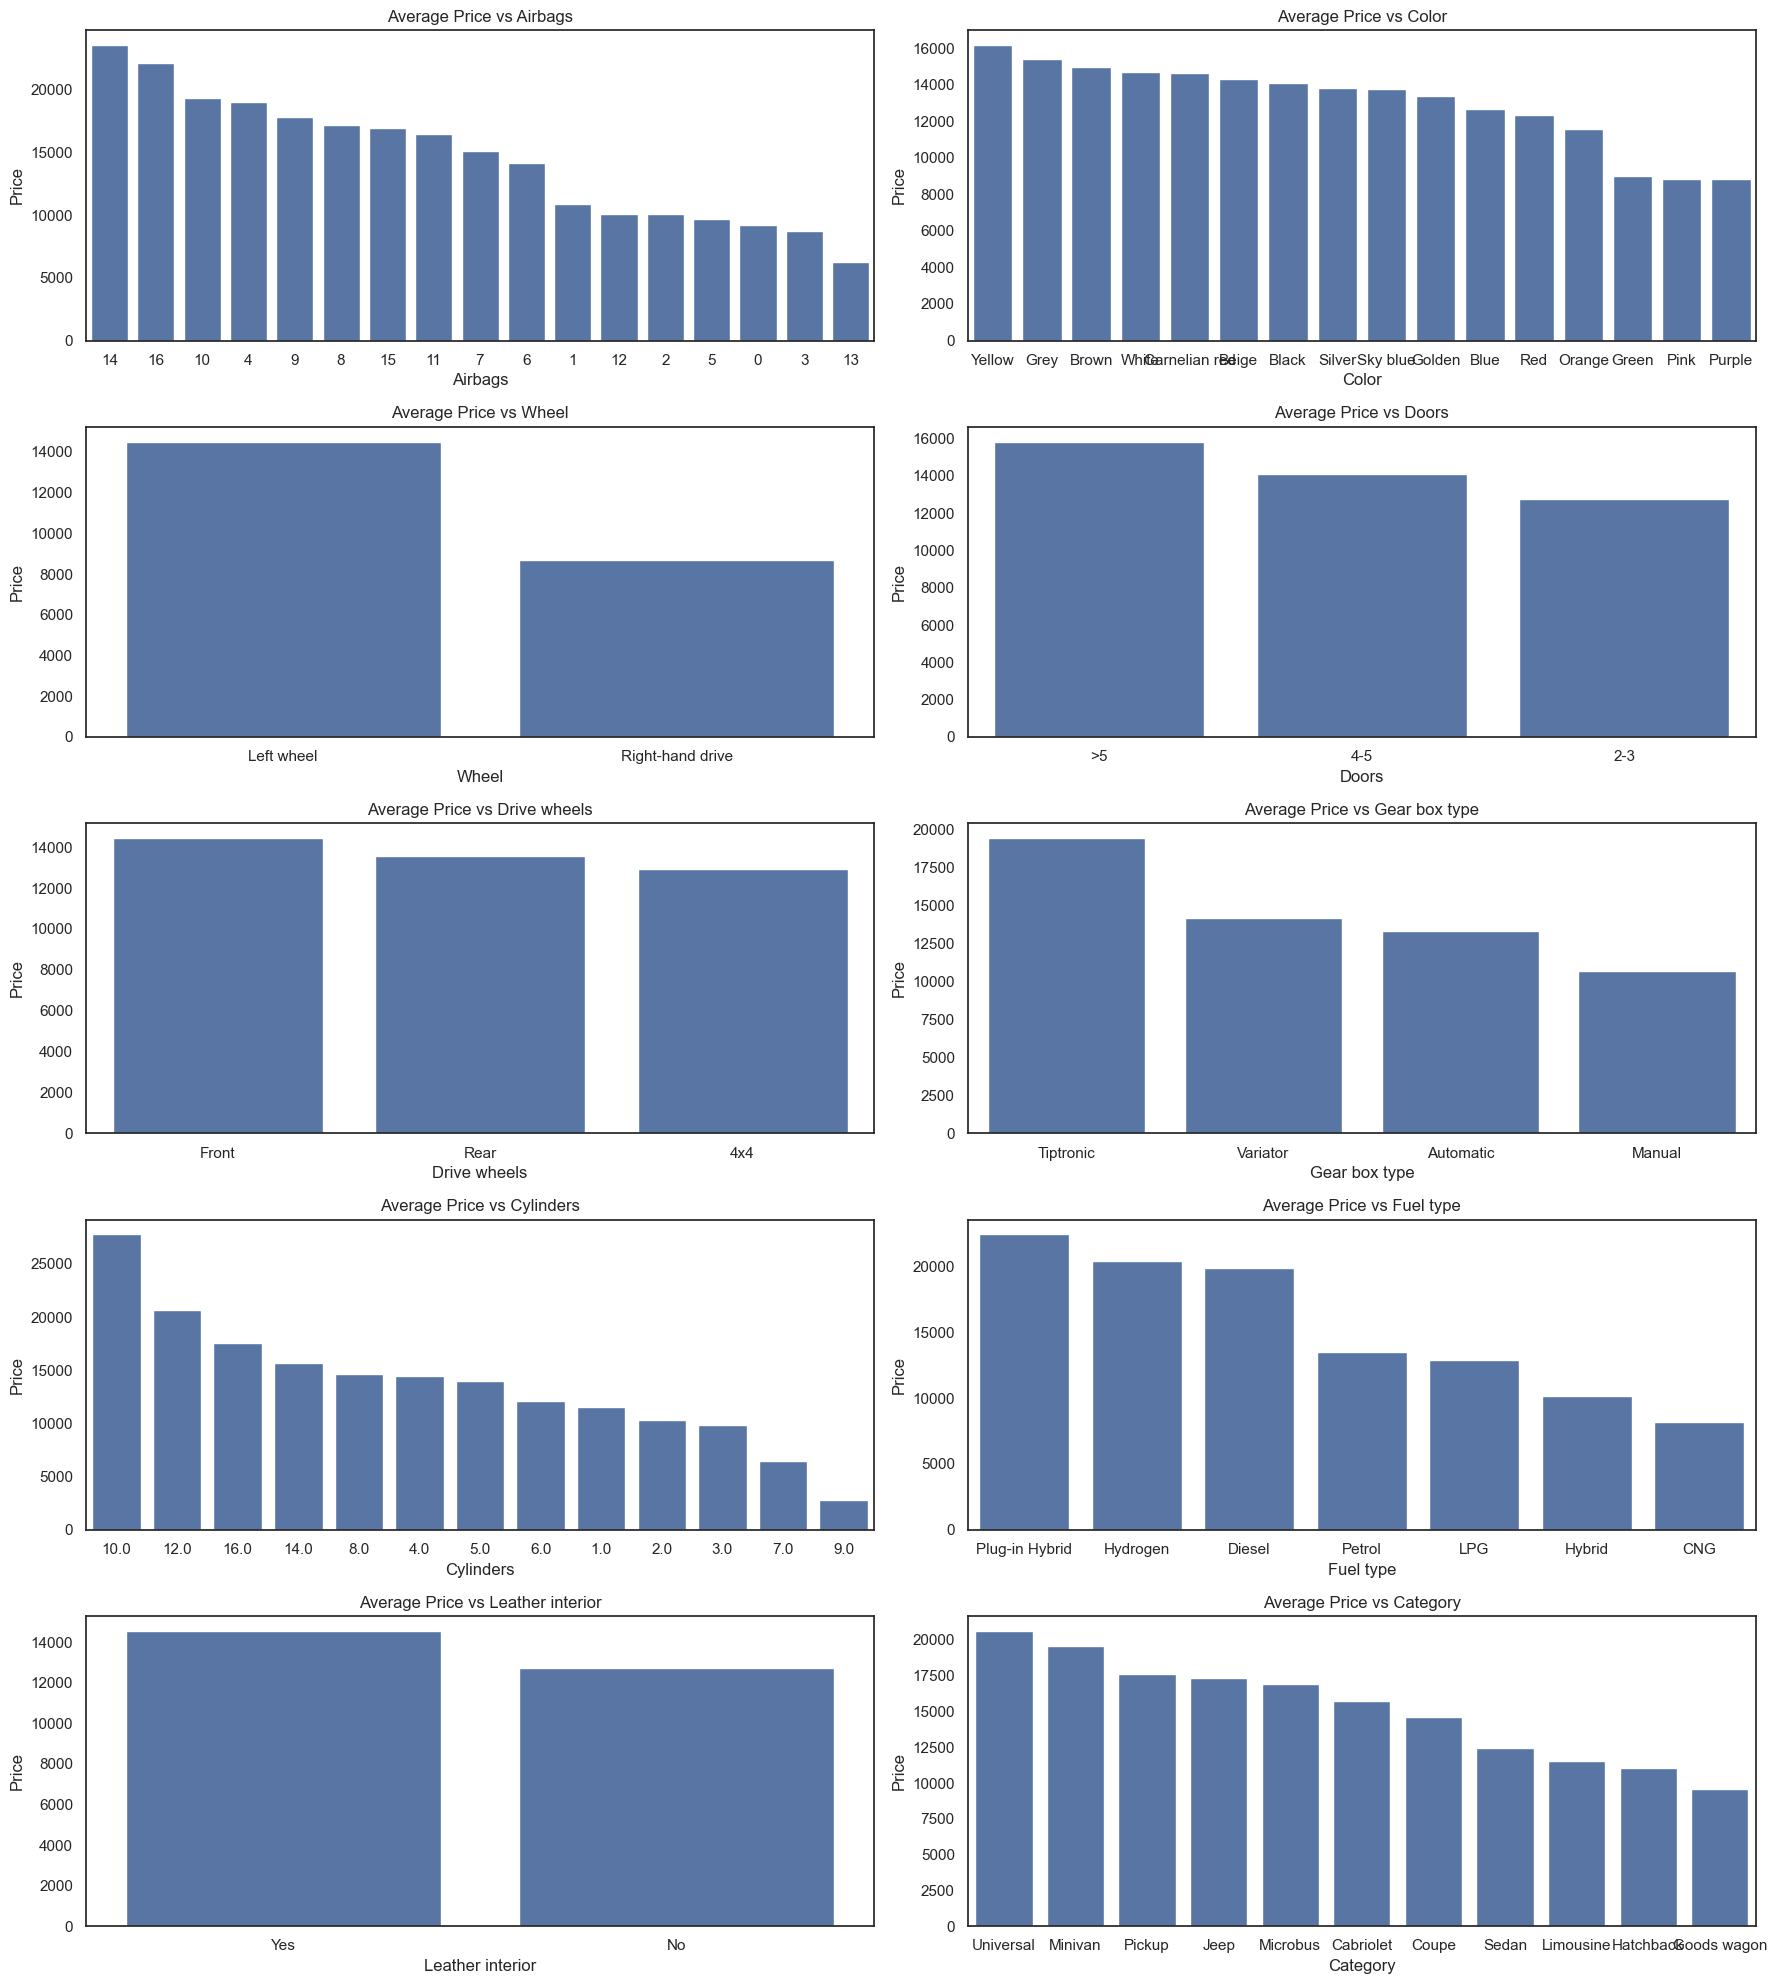

In [86]:
columns_to_plot = ['Airbags', 'Color', 'Wheel', 'Doors', 'Drive wheels', 'Gear box type', 'Cylinders', 'Fuel type', 'Leather interior', 'Category']
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(18, 20))
axes = axes.flatten()
for i, column in enumerate(columns_to_plot):
    sorted_data = df.groupby(column)['Price'].mean().sort_values(ascending=False).index
    sns.barplot(x=column, y='Price', data=df, order=sorted_data, ax=axes[i], ci=None)
    axes[i].set_title(f'Average Price vs {column}')
plt.tight_layout()
plt.show()

In [87]:
df['Age'] = 2024 - df['Prod. year']
df = df.drop(columns=['Prod. year'])

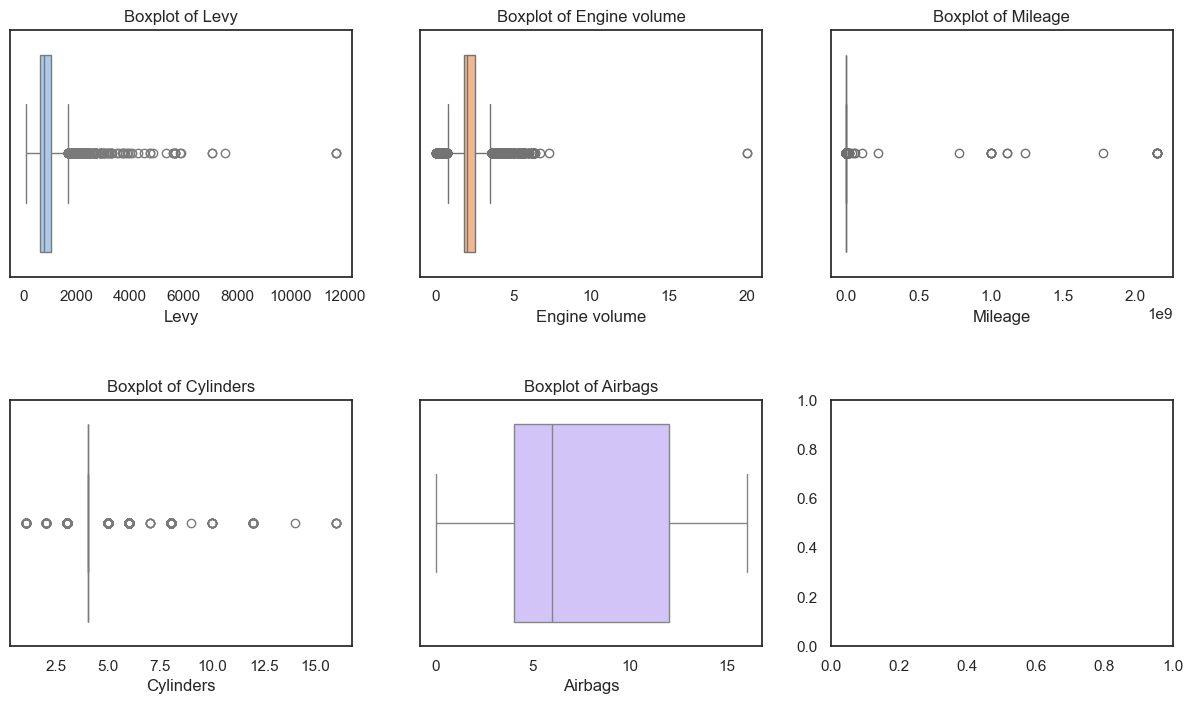

In [88]:
columns_for_boxplots = ['Levy', 'Engine volume', 'Mileage', 'Cylinders', 'Airbags']
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 8))
fig.subplots_adjust(hspace=0.5)
axes = axes.flatten()
color_palette = sns.color_palette("pastel")
for i, column in enumerate(columns_for_boxplots):
    sns.boxplot(x=df[column], ax=axes[i], color=color_palette[i])
    axes[i].set_title(f'Boxplot of {column}')
    axes[i].set_xlabel(column)

plt.show()

In [89]:
columns_to_check = ['Levy', 'Engine volume', 'Mileage','Cylinders']
outlier_counts = {}
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    outlier_count = outliers.shape[0]
    df_cleaned = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_cleaned, outlier_count
for column in columns_to_check:
    df, count = remove_outliers_iqr(df, column)
    outlier_counts[column] = count
print("Outlier Counts:")
for column, count in outlier_counts.items():
    print(f"{column}: {count}")

Outlier Counts:
Levy: 639
Engine volume: 446
Mileage: 560
Cylinders: 1620


In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9164 entries, 3 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Price             9164 non-null   int64   
 1   Levy              9164 non-null   float64 
 2   Manufacturer      9164 non-null   object  
 3   Model             9164 non-null   object  
 4   Category          9164 non-null   object  
 5   Leather interior  9164 non-null   object  
 6   Fuel type         9164 non-null   object  
 7   Engine volume     9164 non-null   float64 
 8   Mileage           9164 non-null   float64 
 9   Cylinders         9164 non-null   float64 
 10  Gear box type     9164 non-null   object  
 11  Drive wheels      9164 non-null   object  
 12  Doors             9164 non-null   category
 13  Wheel             9164 non-null   object  
 14  Color             9164 non-null   object  
 15  Airbags           9164 non-null   int64   
 16  Turbo             9164 non-n

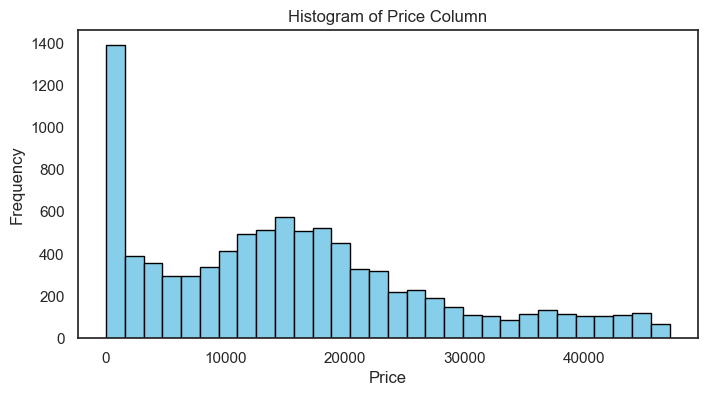

In [91]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 4))
plt.hist(df['Price'], bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of Price Column')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

In [92]:
rows_with_low_price = df[df['Price'] < 500]
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
display(rows_with_low_price)

,Price,Levy,Manufacturer,Model,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Turbo,Age
53,392,1017.0,MERCEDES-BENZ,E 300,Sedan,Yes,Petrol,2.0,1600.0,4.0,Automatic,Rear,4-5,Left wheel,Black,12,0,7
68,314,779.0,TOYOTA,Camry,Sedan,Yes,Hybrid,2.5,225510.0,4.0,Automatic,Front,4-5,Left wheel,White,12,0,11
79,220,1185.0,FORD,Escape,Jeep,Yes,Hybrid,2.5,193614.0,4.0,Automatic,Front,4-5,Left wheel,White,0,0,15
102,314,382.0,FORD,Fusion,Sedan,Yes,Hybrid,2.0,91760.0,4.0,Automatic,Front,4-5,Left wheel,Black,12,0,9
142,314,259.0,CHEVROLET,Volt,Hatchback,Yes,Hybrid,1.4,131893.0,4.0,Automatic,Front,4-5,Left wheel,Brown,0,0,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19100,392,585.0,TOYOTA,Prius,Sedan,Yes,Hybrid,1.8,114526.0,4.0,Automatic,Front,4-5,Left wheel,White,12,0,11
19156,470,738.0,FIAT,500,Jeep,Yes,Petrol,1.4,70941.0,4.0,Automatic,Front,4-5,Left wheel,Green,12,0,7
19215,470,831.0,HYUNDAI,Elantra,Sedan,Yes,Petrol,1.6,25635.0,4.0,Automatic,Front,4-5,Left wheel,Black,12,0,7
19230,470,645.0,TOYOTA,Prius,Hatchback,Yes,Hybrid,1.8,307325.0,4.0,Automatic,Front,4-5,Left wheel,Silver,12,0,13


In [93]:
df = df[df['Price'] >= 500]
df

,Price,Levy,Manufacturer,Model,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Turbo,Age
3,3607,862.0,FORD,Escape,Jeep,Yes,Hybrid,2.5,168966.0,4.0,Automatic,4x4,4-5,Left wheel,White,0,0,13
4,11726,446.0,HONDA,FIT,Hatchback,Yes,Petrol,1.3,91901.0,4.0,Automatic,Front,4-5,Left wheel,Silver,4,0,10
5,39493,891.0,HYUNDAI,Santa FE,Jeep,Yes,Diesel,2.0,160931.0,4.0,Automatic,Front,4-5,Left wheel,White,4,0,8
6,1803,761.0,TOYOTA,Prius,Hatchback,Yes,Hybrid,1.8,258909.0,4.0,Automatic,Front,4-5,Left wheel,White,12,0,14
7,549,751.0,HYUNDAI,Sonata,Sedan,Yes,Petrol,2.4,216118.0,4.0,Automatic,Front,4-5,Left wheel,Grey,12,0,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19217,26017,1624.0,LEXUS,ES 300,Sedan,Yes,Petrol,3.5,132700.0,4.0,Automatic,Front,4-5,Left wheel,White,4,0,15
19225,8781,1107.0,OPEL,Combo,Goods wagon,No,Diesel,1.7,236000.0,4.0,Manual,Front,4-5,Left wheel,Beige,4,1,17
19233,15681,831.0,HYUNDAI,Sonata,Sedan,Yes,Petrol,2.4,161600.0,4.0,Tiptronic,Front,4-5,Left wheel,Red,8,0,13
19234,26108,836.0,HYUNDAI,Tucson,Jeep,Yes,Diesel,2.0,116365.0,4.0,Automatic,Front,4-5,Left wheel,Grey,4,0,14


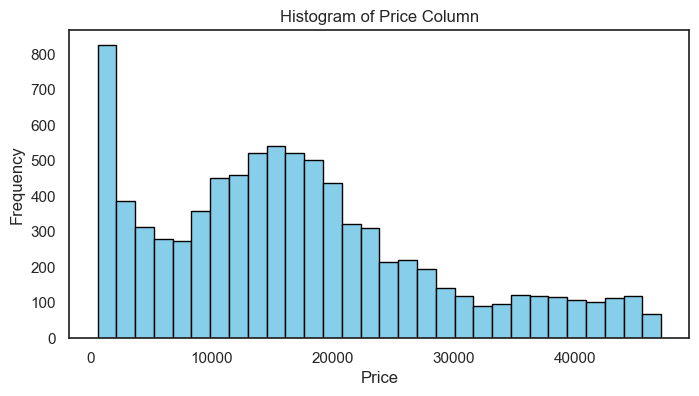

In [94]:
plt.figure(figsize=(8, 4))
plt.hist(df['Price'], bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of Price Column')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

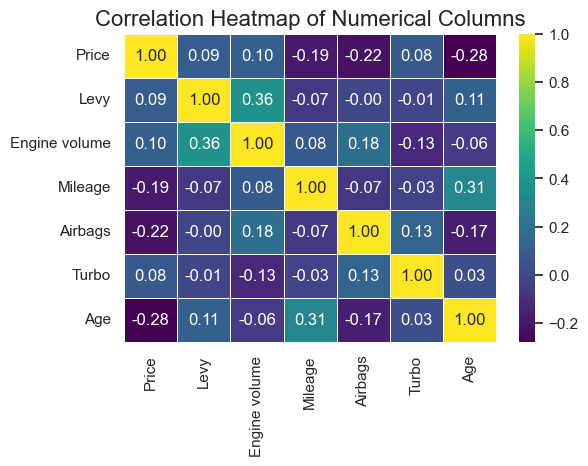

In [95]:
numerical_columns = df.select_dtypes(include=['int64', 'float64']).drop(columns=['Cylinders'], errors='ignore')
correlation_matrix = numerical_columns.corr()
sns.set(style="white")
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap="viridis", fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of Numerical Columns', fontsize=16)
plt.show()

In [96]:
df1=df #df1 to be used for Leaveoneout encoding
df2=df #df2 to be used for Target encoding

In [97]:
from sklearn.preprocessing import  OneHotEncoder

categorical_columns = df.select_dtypes(include=['object', 'category']).columns
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)
pd.set_option('display.max_columns', None)
df_encoded

,Price,Levy,Engine volume,Mileage,Cylinders,Airbags,Turbo,Age,Manufacturer_AUDI,Manufacturer_BMW,Manufacturer_BUICK,Manufacturer_CADILLAC,Manufacturer_CHEVROLET,Manufacturer_CHRYSLER,Manufacturer_CITROEN,Manufacturer_DAEWOO,Manufacturer_DODGE,Manufacturer_FIAT,Manufacturer_FORD,Manufacturer_GMC,Manufacturer_HONDA,Manufacturer_HYUNDAI,Manufacturer_JAGUAR,Manufacturer_JEEP,Manufacturer_KIA,Manufacturer_LEXUS,Manufacturer_LINCOLN,Manufacturer_MAZDA,Manufacturer_MERCEDES-BENZ,Manufacturer_MERCURY,Manufacturer_MINI,Manufacturer_MITSUBISHI,Manufacturer_NISSAN,Manufacturer_OPEL,Manufacturer_PEUGEOT,Manufacturer_PORSCHE,Manufacturer_RENAULT,Manufacturer_SCION,Manufacturer_SKODA,Manufacturer_SSANGYONG,Manufacturer_SUBARU,Manufacturer_SUZUKI,Manufacturer_TOYOTA,Manufacturer_VAZ,Manufacturer_VOLKSWAGEN,Model_1000,Model_114,Model_118,Model_1300,Model_1500,Model_200,Model_207,Model_2107,Model_2121 (Niva),Model_316 1995,Model_318,Model_320,Model_320 2.0,Model_328,Model_328 sulev,Model_400X,Model_406,Model_428,Model_428 i,Model_4Runner,Model_500,Model_500 46 ml,Model_500 Lounge,Model_500 SPORT,Model_500 Sport,Model_500 s,Model_500 sport panorama,Model_500C Lounge,Model_500L,Model_500L LONG,Model_500X Lounge,Model_520 d xDrive Luxury,Model_528,Model_530,Model_616,Model_A 140,Model_A3,Model_A3 4X4,Model_A4,Model_A4 premium plius,Model_A5,Model_A6,Model_ATS,Model_Acadia,Model_Accent,Model_Accent GS,Model_Accent SE,Model_Accord,Model_Actyon,Model_Allroad,Model_Altima,Model_Aqua,Model_Aqua G,Model_Aqua G klas,Model_Aqua S,Model_Aqua g soft leather sele,Model_Aqua s,Model_Aqua sport,Model_Astra,Model_Astra H,Model_Astra j,Model_Auris,Model_Avalon,Model_Avalon LIMITED,Model_Avalon limited,Model_Avella,Model_Avenger,Model_Aveo,Model_Axela,Model_B 180,Model_BRZ,Model_Berlingo,Model_C 180,Model_C 220,Model_C 230,Model_C 230 kompresor,Model_C 250,Model_C 250 1.8,Model_C 250 A.M.G,Model_C 250 AMG,"Model_C 250 AMG-PAKET-1,8",Model_C 250 luxury,Model_C 300,Model_C-MAX,Model_C-MAX PREMIUM,Model_C-MAX SE,Model_C-MAX SEL,Model_C1,Model_C1 C,Model_C4,Model_C8,Model_CC,Model_CHR,Model_CLA 250,Model_CLA 250 AMG,Model_CR-Z,Model_CT 200h,Model_CT 200h F-sport,Model_CTS,Model_CX-5,Model_CX-5 Touring,Model_CX-7,Model_CX-9,Model_Caddy,Model_Cadenza,Model_Caliber,Model_Caliber sxt,Model_Camaro,Model_Camry,Model_Camry HYBRID,Model_Camry Hybrid,Model_Camry LE,Model_Camry SE,Model_Camry SE HIBRYD,Model_Camry SPORT,Model_Camry SPORT PAKET,Model_Camry Se,Model_Camry XLE,Model_Camry XSE,Model_Camry XV50,Model_Camry se,Model_Camry sport,Model_Camry sport se,Model_Camry sporti,Model_Camry ჰიბრიდი,Model_Captiva,Model_Captur QM3 Samsung,Model_Carens,Model_Carnival,Model_Carnival grand,Model_Cayman,Model_Ceed,Model_Century,Model_Cerato,Model_Cerato K3,Model_Cherokee,Model_Citan,Model_Civic,Model_Civic EX,Model_Civic Hybrid,Model_Colt,Model_Colt Lancer,Model_Combo,Model_Combo 1700,Model_Compass,Model_Cooper,Model_Cooper CLUBMAN,Model_Cooper S,Model_Cooper S Cabrio,Model_Corolla,Model_Corolla 04,Model_Corolla ECO,Model_Corolla IM,Model_Corolla Im,Model_Corolla LE,Model_Corolla S,Model_Corsa,Model_Corvette,Model_Countryman,Model_Countryman S turbo,Model_Countryman sport,Model_Cr-v,Model_Crafter,"Model_Crafter 2,5TDI",Model_Crosstrek,Model_Cruze,Model_Cruze L T,Model_Cruze LS,Model_Cruze LT,Model_Cruze LT RS,Model_Cruze PREMIER,Model_Cruze Premier,Model_Cruze RS,Model_Cruze ltz,Model_Cruze sonic,Model_Cruze strocna,Model_Dart,Model_Dart GT 2.4,Model_Demio,Model_E 220,Model_E 220 CDI,Model_E 220 cdi,Model_E 250,Model_E 300,Model_E 350,Model_E 350 ამგ,Model_E-pace,Model_ES 300,Model_ES 350,Model_Eclipse ES,Model_EcoSport SE,Model_Elantra,Model_Elantra 2014,Model_Elantra 2016,Model_Elantra GLS / LIMITED,Model_Elantra GT,Model_Elantra Gt,Model_Elantra LIMITED,Model_Elantra LIMITEDI,Model_Elantra Limited,Model_Elantra SE,Model_Elantra gt,Model_Elantra i30,Model_Elantra limited,Model_Elantra se,Model_Elantra sport limited,Model_Element,Model_Elysion,Model_Encore,Model_Equinox,Model_Equin

In [98]:
for column in df_encoded.columns:
    if df_encoded[column].dtype == bool:
        df_encoded[column] = df_encoded[column].astype(int)

df_encoded

,Price,Levy,Engine volume,Mileage,Cylinders,Airbags,Turbo,Age,Manufacturer_AUDI,Manufacturer_BMW,Manufacturer_BUICK,Manufacturer_CADILLAC,Manufacturer_CHEVROLET,Manufacturer_CHRYSLER,Manufacturer_CITROEN,Manufacturer_DAEWOO,Manufacturer_DODGE,Manufacturer_FIAT,Manufacturer_FORD,Manufacturer_GMC,Manufacturer_HONDA,Manufacturer_HYUNDAI,Manufacturer_JAGUAR,Manufacturer_JEEP,Manufacturer_KIA,Manufacturer_LEXUS,Manufacturer_LINCOLN,Manufacturer_MAZDA,Manufacturer_MERCEDES-BENZ,Manufacturer_MERCURY,Manufacturer_MINI,Manufacturer_MITSUBISHI,Manufacturer_NISSAN,Manufacturer_OPEL,Manufacturer_PEUGEOT,Manufacturer_PORSCHE,Manufacturer_RENAULT,Manufacturer_SCION,Manufacturer_SKODA,Manufacturer_SSANGYONG,Manufacturer_SUBARU,Manufacturer_SUZUKI,Manufacturer_TOYOTA,Manufacturer_VAZ,Manufacturer_VOLKSWAGEN,Model_1000,Model_114,Model_118,Model_1300,Model_1500,Model_200,Model_207,Model_2107,Model_2121 (Niva),Model_316 1995,Model_318,Model_320,Model_320 2.0,Model_328,Model_328 sulev,Model_400X,Model_406,Model_428,Model_428 i,Model_4Runner,Model_500,Model_500 46 ml,Model_500 Lounge,Model_500 SPORT,Model_500 Sport,Model_500 s,Model_500 sport panorama,Model_500C Lounge,Model_500L,Model_500L LONG,Model_500X Lounge,Model_520 d xDrive Luxury,Model_528,Model_530,Model_616,Model_A 140,Model_A3,Model_A3 4X4,Model_A4,Model_A4 premium plius,Model_A5,Model_A6,Model_ATS,Model_Acadia,Model_Accent,Model_Accent GS,Model_Accent SE,Model_Accord,Model_Actyon,Model_Allroad,Model_Altima,Model_Aqua,Model_Aqua G,Model_Aqua G klas,Model_Aqua S,Model_Aqua g soft leather sele,Model_Aqua s,Model_Aqua sport,Model_Astra,Model_Astra H,Model_Astra j,Model_Auris,Model_Avalon,Model_Avalon LIMITED,Model_Avalon limited,Model_Avella,Model_Avenger,Model_Aveo,Model_Axela,Model_B 180,Model_BRZ,Model_Berlingo,Model_C 180,Model_C 220,Model_C 230,Model_C 230 kompresor,Model_C 250,Model_C 250 1.8,Model_C 250 A.M.G,Model_C 250 AMG,"Model_C 250 AMG-PAKET-1,8",Model_C 250 luxury,Model_C 300,Model_C-MAX,Model_C-MAX PREMIUM,Model_C-MAX SE,Model_C-MAX SEL,Model_C1,Model_C1 C,Model_C4,Model_C8,Model_CC,Model_CHR,Model_CLA 250,Model_CLA 250 AMG,Model_CR-Z,Model_CT 200h,Model_CT 200h F-sport,Model_CTS,Model_CX-5,Model_CX-5 Touring,Model_CX-7,Model_CX-9,Model_Caddy,Model_Cadenza,Model_Caliber,Model_Caliber sxt,Model_Camaro,Model_Camry,Model_Camry HYBRID,Model_Camry Hybrid,Model_Camry LE,Model_Camry SE,Model_Camry SE HIBRYD,Model_Camry SPORT,Model_Camry SPORT PAKET,Model_Camry Se,Model_Camry XLE,Model_Camry XSE,Model_Camry XV50,Model_Camry se,Model_Camry sport,Model_Camry sport se,Model_Camry sporti,Model_Camry ჰიბრიდი,Model_Captiva,Model_Captur QM3 Samsung,Model_Carens,Model_Carnival,Model_Carnival grand,Model_Cayman,Model_Ceed,Model_Century,Model_Cerato,Model_Cerato K3,Model_Cherokee,Model_Citan,Model_Civic,Model_Civic EX,Model_Civic Hybrid,Model_Colt,Model_Colt Lancer,Model_Combo,Model_Combo 1700,Model_Compass,Model_Cooper,Model_Cooper CLUBMAN,Model_Cooper S,Model_Cooper S Cabrio,Model_Corolla,Model_Corolla 04,Model_Corolla ECO,Model_Corolla IM,Model_Corolla Im,Model_Corolla LE,Model_Corolla S,Model_Corsa,Model_Corvette,Model_Countryman,Model_Countryman S turbo,Model_Countryman sport,Model_Cr-v,Model_Crafter,"Model_Crafter 2,5TDI",Model_Crosstrek,Model_Cruze,Model_Cruze L T,Model_Cruze LS,Model_Cruze LT,Model_Cruze LT RS,Model_Cruze PREMIER,Model_Cruze Premier,Model_Cruze RS,Model_Cruze ltz,Model_Cruze sonic,Model_Cruze strocna,Model_Dart,Model_Dart GT 2.4,Model_Demio,Model_E 220,Model_E 220 CDI,Model_E 220 cdi,Model_E 250,Model_E 300,Model_E 350,Model_E 350 ამგ,Model_E-pace,Model_ES 300,Model_ES 350,Model_Eclipse ES,Model_EcoSport SE,Model_Elantra,Model_Elantra 2014,Model_Elantra 2016,Model_Elantra GLS / LIMITED,Model_Elantra GT,Model_Elantra Gt,Model_Elantra LIMITED,Model_Elantra LIMITEDI,Model_Elantra Limited,Model_Elantra SE,Model_Elantra gt,Model_Elantra i30,Model_Elantra limited,Model_Elantra se,Model_Elantra sport limited,Model_Element,Model_Elysion,Model_Encore,Model_Equinox,Model_Equin

In [99]:
from sklearn.metrics import mean_absolute_error
import xgboost as xgb
import lightgbm as lgb
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

X = df_encoded.drop(columns=['Price','Cylinders'])
y = df_encoded['Price']

X_train, X_eval, y_train, y_eval = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)

X_eval_scaled = scaler.transform(X_eval)


# Initialize Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
# Initialize XGBoost Regressor
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
# Initialize LightGBM Regressor
lgb_model = lgb.LGBMRegressor(random_state=42)

models = {'RandomForest': rf_model, 'XGBoost': xgb_model, 'LightGBM': lgb_model}

results = {'Model': [], 'MAE (Train)': [], 'MAE (Test)': [], 'R-squared (Train)': [], 'R-squared (Test)': []}

for model_name, model in models.items():
    model.fit(X_train_scaled, y_train)

    y_train_pred = model.predict(X_train_scaled)

    y_eval_pred = model.predict(X_eval_scaled)

    mae_train = mean_absolute_error(y_train, y_train_pred)
    mae_eval = mean_absolute_error(y_eval, y_eval_pred)
    r2_train = r2_score(y_train, y_train_pred)
    r2_eval = r2_score(y_eval, y_eval_pred)

    results['Model'].append(model_name)
    results['MAE (Train)'].append(mae_train)
    results['MAE (Test)'].append(mae_eval)
    results['R-squared (Train)'].append(r2_train)
    results['R-squared (Test)'].append(r2_eval)

results_df = pd.DataFrame(results)

results_df

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001460 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 849
[LightGBM] [Info] Number of data points in the train set: 6760, number of used features: 109
[LightGBM] [Info] Start training from score 16953.717604


,Model,MAE (Train),MAE (Test),R-squared (Train),R-squared (Test)
0,RandomForest,1161.156732,2870.377566,0.972551,0.829737
1,XGBoost,2702.945524,3356.928762,0.895856,0.810198
2,LightGBM,3007.462218,3394.334959,0.866114,0.814998


In [100]:
from sklearn.metrics import mean_absolute_error
import pandas as pd
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

X = df_encoded.drop(columns=['Price','Cylinders'])
y = df_encoded['Price']

X_train, X_eval, y_train, y_eval = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)

X_eval_scaled = scaler.transform(X_eval)

# Initialize LinearRegression
lr_model = LinearRegression()
# Initialize GaussianNB
gnb_model = GaussianNB()
# Initialize Rige
rige_model = Ridge(alpha = 1.0)
#Initializing the Lasso
lasso_model = Lasso()
# Initialize elastic net
en_model = ElasticNet(random_state=0)

models = {'LinearRegression': lr_model, 'GaussianNB': gnb_model, 'Rige_model': rige_model, 'Lasso': lasso_model, 'Elastic_net': en_model}
results = {'Model': [], 'MAE (Train)': [], 'MAE (Test)': [], 'R-squared (Train)': [], 'R-squared (Test)': []}

for model_name, model in models.items():
    model.fit(X_train_scaled, y_train)

    y_train_pred = model.predict(X_train_scaled)

    y_eval_pred = model.predict(X_eval_scaled)

    mae_train = mean_absolute_error(y_train, y_train_pred)
    mae_eval = mean_absolute_error(y_eval, y_eval_pred)
    r2_train = r2_score(y_train, y_train_pred)
    r2_eval = r2_score(y_eval, y_eval_pred)

    results['Model'].append(model_name)
    results['MAE (Train)'].append(mae_train)
    results['MAE (Test)'].append(mae_eval)
    results['R-squared (Train)'].append(r2_train)
    results['R-squared (Test)'].append(r2_eval)

results_df = pd.DataFrame(results)

results_df

c:\Users\Albaloo PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.965e+09, tolerance: 8.967e+07
  model = cd_fast.enet_coordinate_descent(


,Model,MAE (Train),MAE (Test),R-squared (Train),R-squared (Test)
0,LinearRegression,5817.478796,1.318727e+16,0.559775,-1.130501e+26
1,GaussianNB,5830.639497,7.566402e+03,0.224166,-1.805679e-02
2,Rige_model,5359.697386,5.774295e+03,0.616047,5.612015e-01
3,Lasso,5362.981213,5.768891e+03,0.615987,5.628285e-01
4,Elastic_net,5910.791284,6.130694e+03,0.557197,5.253554e-01


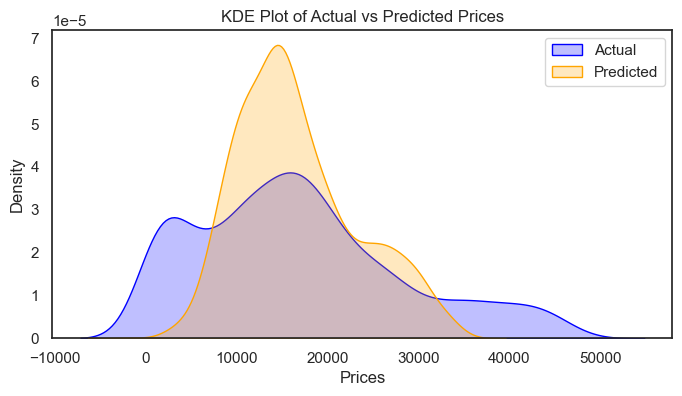

In [101]:
plot_data = pd.DataFrame({'Actual': y_eval, 'Predicted': y_eval_pred})

plt.figure(figsize=(8, 4))
sns.kdeplot(data=plot_data, x='Actual', label='Actual', fill=True, common_norm=False, color='blue')
sns.kdeplot(data=plot_data, x='Predicted', label='Predicted', fill=True, common_norm=False, color='orange')
plt.title('KDE Plot of Actual vs Predicted Prices')
plt.xlabel('Prices')
plt.ylabel('Density')
plt.legend()
plt.show()